In [ ]:
pip install sklearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

The data is related with direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/output/data.csv")
print(data.shape)
print(list(data.columns))

(31647, 19)
['id', 'customer_age', 'job_type', 'marital', 'education', 'default', 'balance', 'housing_loan', 'personal_loan', 'communication_type', 'day_of_month', 'month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign', 'prev_campaign_outcome', 'term_deposit_subscribed', 'spending_score']


In [ ]:
train = data
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0,17
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,70
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0,65
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,20,may,127.0,3.0,0.0,0,unknown,0,49
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0,70


#### Input variables

id                                  
customer_age                        
job_type                            
marital                             
education                           
default                             
balance                             
housing_loan                        
personal_loan                       
communication_type                  
day_of_month                        
month                               
last_contact_duration               
num_contacts_in_campaign            
days_since_prev_campaign_contact    
num_contacts_prev_campaign          
prev_campaign_outcome               
spending_score                      

#### Predictor variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

### Data exploration

In [ ]:
data['term_deposit_subscribed'].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

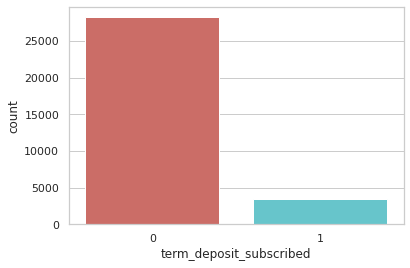

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='term_deposit_subscribed',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 28253 no's and 3394 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [ ]:
data.groupby('term_deposit_subscribed').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,spending_score
term_deposit_subscribed,,,,,,,,
0,39.522104,1295.439387,15.896153,217.011008,2.843946,37.644356,0.513751,53.309949
1,40.698291,1812.237478,15.172658,558.801120,2.124632,72.187979,1.239835,53.549204


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The balance is understandably higher for the customers who bought it than the customers who did not. The last_contact_duration is considerably higher for the customer subscribing to the Term Deposit meaning that the better the chances of a sale.

Surprisingly, num_contacts_in_campaign (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit. But, one thing should also be noted that num_contacts_prev_campaign is higher meaning that the contacts made during previous campaign might have changed their mind towards the current campaign.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
data.groupby('job_type').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,spending_score
job_type,,,,,,,,,
admin.,38.020403,1089.189964,15.591398,241.205955,2.575682,49.400882,0.704163,0.104770,53.379377
blue-collar,38.789759,1066.003961,15.475499,259.503668,2.805018,45.065581,0.504842,0.066461,52.895833
entrepreneur,40.724204,1611.806172,15.702025,252.133076,2.846673,29.668274,0.431051,0.073288,52.972999
housemaid,44.884658,1406.165733,16.122060,236.864502,2.799552,25.395297,0.412094,0.081747,54.892497
management,39.085359,1771.249775,16.123612,246.452295,2.861236,39.551455,0.677918,0.126763,53.343834
retired,60.105594,1969.561282,15.342552,277.648020,2.366436,38.653048,0.656820,0.216845,53.100566
self-employed,39.261926,1666.382538,16.323132,272.571557,2.896490,38.094509,0.562556,0.117012,54.224122
services,37.574410,997.332193,15.572015,254.550804,2.748888,44.076291,0.519672,0.079028,53.631885
student,25.523379,1375.101056,15.067873,242.051282,2.286576,60.911011,0.975867,0.269985,51.707391


In [ ]:
data.groupby('marital').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,spending_score
marital,,,,,,,,,
divorced,44.544249,1210.461705,15.705548,258.959675,2.644384,41.654668,0.538566,0.106089,54.011908
married,42.014938,1412.153919,15.899076,249.504249,2.835524,38.774452,0.573291,0.093059,53.268092
single,32.549057,1277.007903,15.692221,260.987806,2.669979,46.679350,0.653156,0.138534,53.139325
unknown,39.313333,1429.413333,15.893333,216.666667,2.820000,44.246667,0.580000,0.080000,56.793333


In [ ]:
data.groupby('education').mean()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,spending_score
education,,,,,,,,,
primary,44.320033,1250.701692,15.388552,253.173804,2.825778,37.360769,0.492375,0.081053,53.310633
secondary,38.784453,1138.999138,15.838493,253.731089,2.705238,43.427956,0.579307,0.094848,53.177325
tertiary,38.244502,1749.481601,16.029718,253.593713,2.833923,40.475807,0.680506,0.139577,53.597146
unknown,43.328173,1510.400155,15.637771,255.204334,2.838235,36.282508,0.472910,0.126935,53.531734


Visualizations

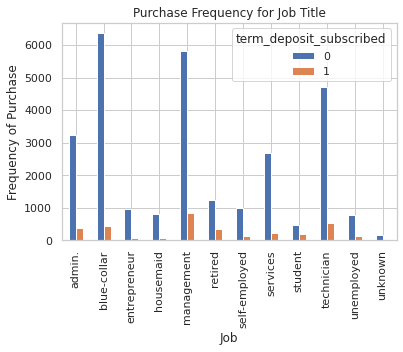

In [ ]:
%matplotlib inline
pd.crosstab(data.job_type,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

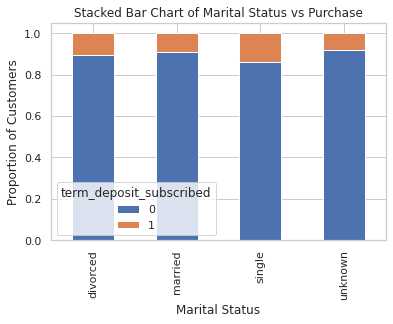

In [ ]:
table=pd.crosstab(data.marital,data.term_deposit_subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

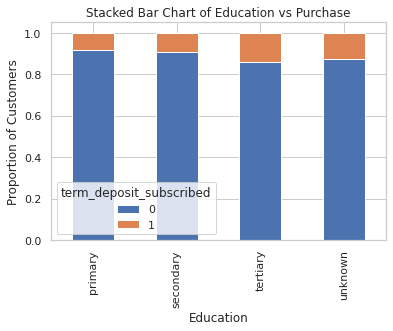

In [ ]:
table=pd.crosstab(data.education,data.term_deposit_subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

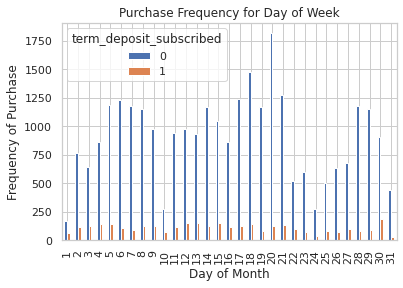

In [ ]:
pd.crosstab(data.day_of_month,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofmonth_bar')

Day of month may not be a good predictor of the outcome

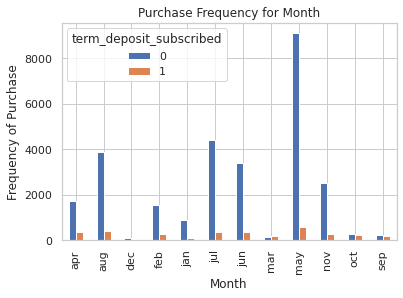

In [ ]:
pd.crosstab(data.month,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

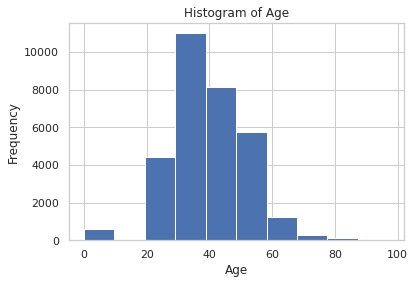

In [ ]:
data.customer_age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

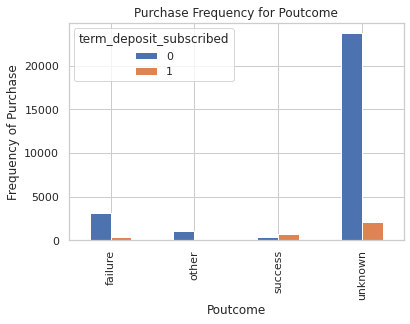

In [ ]:
pd.crosstab(data.prev_campaign_outcome,data.term_deposit_subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Prev_campaign_outcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','day_of_month','month','prev_campaign_outcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [ ]:
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','day_of_month','month','prev_campaign_outcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['id', 'customer_age', 'balance', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed',
       'spending_score', 'job_type_admin.', 'job_type_blue-collar',
       'job_type_entrepreneur', 'job_type_housemaid',
       'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'job_type_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no',
       'default_yes', 'housing_loan_no', 'housing_loan_yes',
       'personal_loan_no', 'personal_loan_unknown', 'personal_loan_yes',
       'communication_type_cellular', 'communication_type_email',
       'communication_type_telephone', 'day_of_month_1', 'day_of_month_2',
       '

In [ ]:
data.shape

(31647, 96)

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['term_deposit_subscribed']
X=[i for i in data_final_vars if i not in y]

In [ ]:
X.remove('id')

In [ ]:
temp = X

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False False False False  True
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False  True False False  True  True False
  True  True False  True  True  True  True  True  True  True  True  True]
[64 67 61 36 66 60 65 47 48 34 13 50  8 55 46 17 49 20 59 24 54 10  1 22
 25 45 31 43 42 41  1 37 11  4 15  1 16 58 63 29 62 52 38  6 40 51  1 57
 19  9 53 30 32 12 21  7  5 33 23 28 56 27 35 18 14 39  1  3 44  1  1  2
  1  1 26  1  1  1  1  1  1  1  1  1]


In [ ]:
rk= rfe.ranking_
cols=list()
for x,y in zip(rk,temp):
  if(x==1):
    cols.append(y)
cols

['marital_unknown',
 'housing_loan_yes',
 'communication_type_email',
 'day_of_month_10',
 'day_of_month_30',
 'month_aug',
 'month_dec',
 'month_jan',
 'month_jul',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'prev_campaign_outcome_failure',
 'prev_campaign_outcome_other',
 'prev_campaign_outcome_success',
 'prev_campaign_outcome_unknown']

In [ ]:
X=data_final[cols]
y=data_final['term_deposit_subscribed']

### Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.280869
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     term_deposit_subscribed   No. Observations:                31647
Model:                               Logit   Df Residuals:                    31629
Method:                                MLE   Df Model:                           17
Date:                     Fri, 30 Apr 2021   Pseudo R-squ.:                  0.1757
Time:                             15:17:34   Log-Likelihood:                -8888.7
converged:                            True   LL-Null:                       -10783.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_unknown               

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.905


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8345  113]
 [ 823  214]]


The result is telling us that we have 8400+196 correct 

1.   List item
2.   List item

predictions and 827+72 incorrect predictions.

#### Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8458
           1       0.65      0.21      0.31      1037

    accuracy                           0.90      9495
   macro avg       0.78      0.60      0.63      9495
weighted avg       0.88      0.90      0.88      9495



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curve

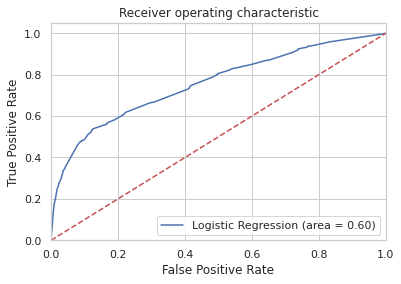

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Prediction on Test data

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/output/test_data.csv")
print(test_data.shape)
print(list(test_data.columns))

(13564, 18)
['id', 'customer_age', 'job_type', 'marital', 'education', 'default', 'balance', 'housing_loan', 'personal_loan', 'communication_type', 'day_of_month', 'month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign', 'prev_campaign_outcome', 'spending_score']


In [ ]:
final_data = test_data

In [ ]:
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','day_of_month','month','prev_campaign_outcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    test_data1=test_data.join(cat_list)
    test_data=test_data1

In [ ]:
cat_vars=['job_type','marital','education','default','housing_loan','personal_loan','communication_type','day_of_month','month','prev_campaign_outcome']
test_data_vars=test_data.columns.values.tolist()
to_keep=[i for i in test_data_vars if i not in cat_vars]

In [ ]:
test_data_final=test_data[to_keep]
test_data_final.columns.values

array(['id', 'customer_age', 'balance', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'spending_score', 'job_type_admin.',
       'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'job_type_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no',
       'default_yes', 'housing_loan_no', 'housing_loan_yes',
       'personal_loan_no', 'personal_loan_unknown', 'personal_loan_yes',
       'communication_type_cellular', 'communication_type_email',
       'communication_type_telephone', 'day_of_month_1', 'day_of_month_2',
       'day_of_month_3', 'day_of_month_4',

In [ ]:
test_data_final_vars=test_data_final.columns.values.tolist()
X=[i for i in test_data_final_vars]

In [ ]:
X.remove('id')

In [ ]:
X

['customer_age',
 'balance',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign',
 'spending_score',
 'job_type_admin.',
 'job_type_blue-collar',
 'job_type_entrepreneur',
 'job_type_housemaid',
 'job_type_management',
 'job_type_retired',
 'job_type_self-employed',
 'job_type_services',
 'job_type_student',
 'job_type_technician',
 'job_type_unemployed',
 'job_type_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_loan_no',
 'housing_loan_yes',
 'personal_loan_no',
 'personal_loan_unknown',
 'personal_loan_yes',
 'communication_type_cellular',
 'communication_type_email',
 'communication_type_telephone',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'day_of_month_4',
 'day_of_month_5',
 'day_of_month_6',
 'day_of_month_7',
 'day_of_mon

In [ ]:
Z = test_data[cols]

In [ ]:
y_pred_testdata = logreg.predict(Z)

In [ ]:
print(len(y_pred_testdata))

13564


In [ ]:
final_data['term_deposit_subscribed'] = y_pred_testdata
final_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,spending_score,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,0.0,0,unknown,87,0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,0.0,0,unknown,24,0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,0.0,0,unknown,73,0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,email,6,jun,34.0,1.0,0.0,0,unknown,33,0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success,98,1


In [ ]:
result = pd.concat([train,final_data])

In [ ]:
result.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,spending_score
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,email,26,jun,303.0,4.0,0.0,0,unknown,0,17
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,70
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0,65
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,email,20,may,127.0,3.0,0.0,0,unknown,0,49
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0,70


In [ ]:
result.shape

(45211, 19)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      45211 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           45211 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           45211 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     45211 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             45211 non-null  object 
 12  last

In [ ]:
result.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset/output/result.csv",index=False)

In [ ]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [ ]:
# Fit data
clf = clf.fit(X_train, y_train)

In [ ]:
# Predict the test set
predictions = clf.predict(X_test)

In [ ]:
# Generate confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8345  113]
 [ 823  214]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8458
           1       0.65      0.21      0.31      1037

    accuracy                           0.90      9495
   macro avg       0.78      0.60      0.63      9495
weighted avg       0.88      0.90      0.88      9495



In [59]:
y_pred_testdata_svm = clf.predict(Z)

In [60]:
y_pred_testdata_svm

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
np.corrcoef(y_pred_testdata,y_pred_testdata_svm)

array([[1.        , 0.89996881],
       [0.89996881, 1.        ]])